# Analyzing Bitcoin Time Series Trends Using Statsmodels

**Welcome!**  
In this notebook, we’ll explore the fundamentals of time series analysis and apply them end-to-end to Bitcoin price data. You’ll learn how to:

1. **Fetch & preprocess** hourly Bitcoin prices  
2. **Visualize** trends, seasonality, and autocorrelation (ACF/PACF)  
3. **Test for stationarity** using ADF and KPSS  
4. **Decompose** the series into trend, seasonal, and residual components  
5. **Fit** an ARIMA model and **forecast** future prices  
6. **Evaluate** model performance and **store** results for downstream use  

We rely exclusively on **statsmodels** for statistical modeling and **matplotlib** for plotting. All reusable logic lives in our `statsmodels_utils.py` module, so you can focus on analysis.

---

## Notebook Outline

1. [Setup & Data Fetching](#setup)  
2. [Exploratory Visualization](#viz)  
3. [Stationarity Testing](#stationarity)  
4. [Seasonal Decomposition](#decomposition)  
5. [ACF & PACF Analysis](#acf-pacf)  
6. [ARIMA Modeling & Forecasting](#arima)  
7. [Evaluation & Storage](#evaluation)  



---
 ## References:
- statsmodels Documentation: https://www.statsmodels.org/
- statsmodels.API.md` for API details.
- CoinGecko API Documentation: https://www.coingecko.com/en/api/documentatio
- Yfinance API Documentation : https://ranaroussi.github.io/yfinance/index.html
- Jupyter Notebook Style Guide: https://github.com/causify-ai/helpers/blob/master/docs/coding/all.jupyter_notebook.how_to_guide.md.mdmd.m
d


#  Introduction to Time-Series Analysis




- A **time-series** data is a series of data points or observations recorded at different or regular time intervals. In general, a time series is a sequence of data points taken at equally spaced time intervals.  The frequency of recorded data points may be hourly, daily, weekly, monthly, quarterly or annually.


- **Time-Series Forecasting** is the process of using a statistical model to predict future values of a time-series based on past results.


- A time series analysis encompasses statistical methods for analyzing time series data. These methods enable us to extract meaningful statistics, patterns and other characteristics of the data. Time series are visualized with the help of line charts. So, time series analysis involves understanding inherent aspects of the time series data so that we can create meaningful and accurate forecasts.


- Applications of time series are used in statistics, finance or business applications. A very common example of time series data is the daily closing value of the stock index like NASDAQ or Dow Jones. Other common applications of time series are sales and demand forecasting, weather forecasting, econometrics, signal processing, pattern recognition and earthquake prediction.



### **Components of a Time-Series**


- **Trend** - The trend shows a general direction of the time series data over a long period of time. A trend can be increasing(upward), decreasing(downward), or horizontal(stationary).


- **Seasonality** - The seasonality component exhibits a trend that repeats with respect to timing, direction, and magnitude. Some examples include an increase in water consumption in summer due to hot weather conditions.


- **Cyclical Component** - These are the trends with no set repetition over a particular period of time. A cycle refers to the period of ups and downs, booms and slums of a time series, mostly observed in business cycles. These cycles do not exhibit a seasonal variation but generally occur over a time period of 3 to 12 years depending on the nature of the time series.


- **Irregular Variation** - These are the fluctuations in the time series data which become evident when trend and cyclical variations are removed. These variations are unpredictable, erratic, and may or may not be random.


- **ETS Decomposition** - ETS Decomposition is used to separate different components of a time series. The term ETS stands for Error, Trend and Seasonality.


- In this notebook, I conduct time series analysis of video game sales over time.

#  Types of data

As stated above, the time series analysis is the statistical analysis of the time series data. A time series data means that data is recorded at different time periods or intervals. The time series data may be of three types:-


1 **Time series data** - The observations of the values of a variable recorded at different points in time is called time series data. 


2 **Cross sectional data** - It is the data of one or more variables recorded at the same point in time.


3 **Pooled data**- It is the combination of time series data and cross sectional data.


#  Time Series terminology


There are various terms and concepts in time series that we should know. These are as follows:-

1	**Dependence**- It refers to the association of two observations of the same variable at prior time periods.


2	**Stationarity**- It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.


3	**Differencing**- Differencing is used to make the series stationary and to control the auto-correlations. There may be some cases in time series analyses where we do not require differencing and over-differenced series can produce wrong estimates.


4	**Specification** - It may involve the testing of the linear or non-linear relationships of dependent variables by using time series models such as ARIMA models. 


5	**Exponential Smoothing** - Exponential smoothing in time series analysis predicts the one next period value based on the past and current value.  It involves averaging of data such that the non-systematic components of each individual case or observation cancel out each other.  The exponential smoothing method is used to predict the short term prediction.



6	**Curve fitting** - Curve fitting regression in time series analysis is used when data is in a non-linear relationship.


7	**ARIMA** - ARIMA stands for Auto Regressive Integrated Moving Average.


In [17]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import logging
import Statsmodels_utils as smu  
import warnings
warnings.filterwarnings("ignore")

# Set up basic logging configuration
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

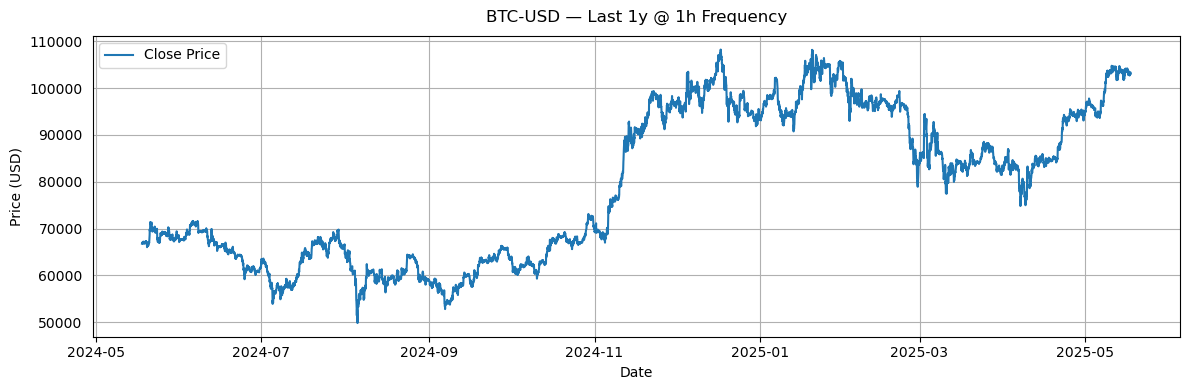

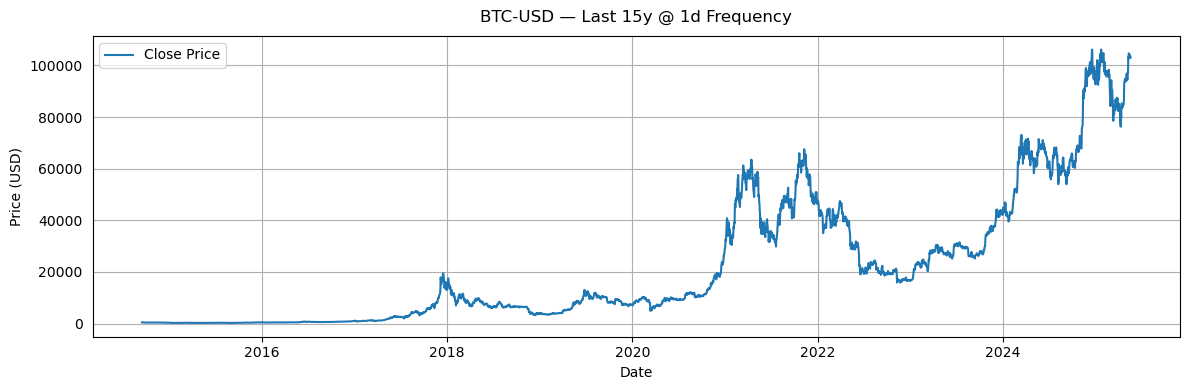

In [164]:
# 2. Import your utils module (adjust case to match your filename)
import Statsmodels_utils as smu

# Hourly (1 year)
btc_hourly = smu.fetch_and_plot_btc_hourly()

# Daily (15 years)
btc_daily  = smu.fetch_and_plot_btc_daily()


#  Patterns in a Time Series

- Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**.


### **Trend**

- A **trend** is observed when there is an increasing or decreasing slope observed in the time series. 


### **Seasonality**

- A **seasonality** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.


However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.


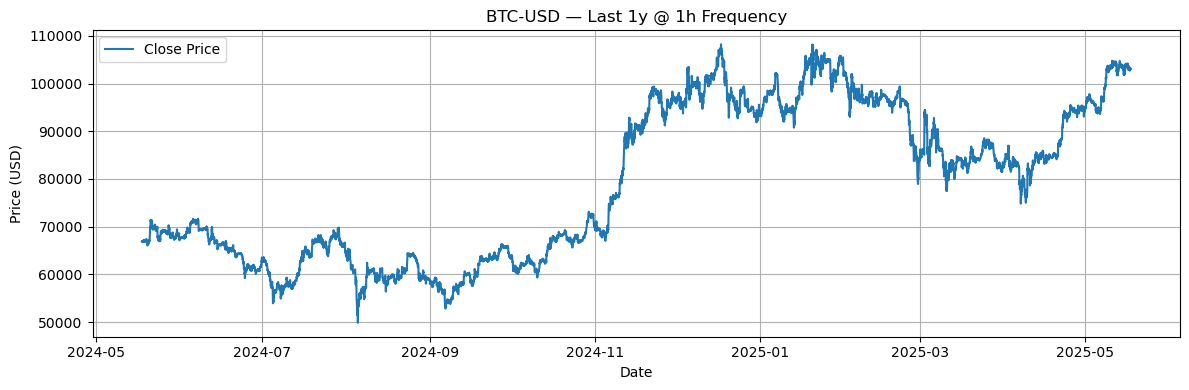

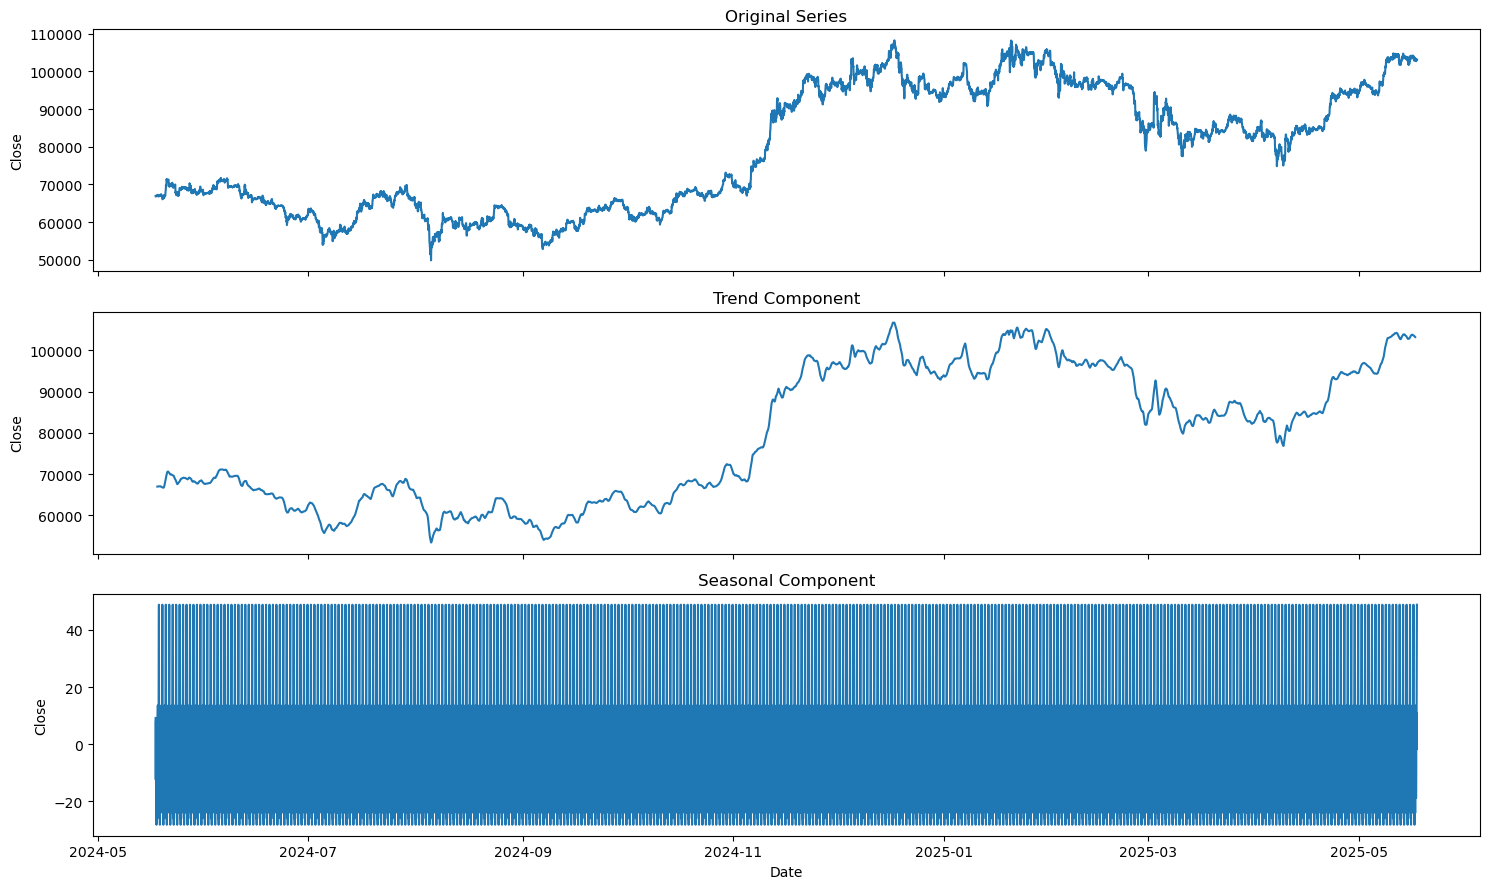

In [23]:
btc_hourly = smu.fetch_and_plot_btc_hourly()
smu.plot_trend_and_seasonality(df=btc_hourly, column="Close", period=24)


Looking at the decomposition plots, I can clearly see that Bitcoin’s hourly price over the past year follows a pronounced trend—rising from around 56k dollars in mid-2024 to over 105 K dollars by late 2024, dipping into early 2025, and then rebounding into May. Beneath this overarching movement lies a consistent 24-hour cycle: the price oscillates by roughly 20 to 40 dollars each day in predictable intraday waves. Because the magnitude of these daily swings remains roughly constant—whether Bitcoin is trading at 60 K dollars  or 100 K dollars, the seasonality behaves additively (adding a fixed offset) rather than multiplicatively (scaling with the level), confirming that an **additive** decomposition best captures this modest but persistent daily rhythm.


## Stationary and Non-Stationary Time Series

- Now, we will discuss **Stationary and Non-Stationary Time Series**. **Stationarity** is a property of a time series where the values of the series are not a function of time—they do not drift upward or downward in mean or variance.  
- Consequently, statistical properties like **mean**, **variance**, and **autocorrelation** are constant over time. Autocorrelation here means the correlation of the series with its own previous values.  
- A truly stationary series is also independent of seasonal effects, meaning no repeating patterns that depend on the hour, day, or month.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


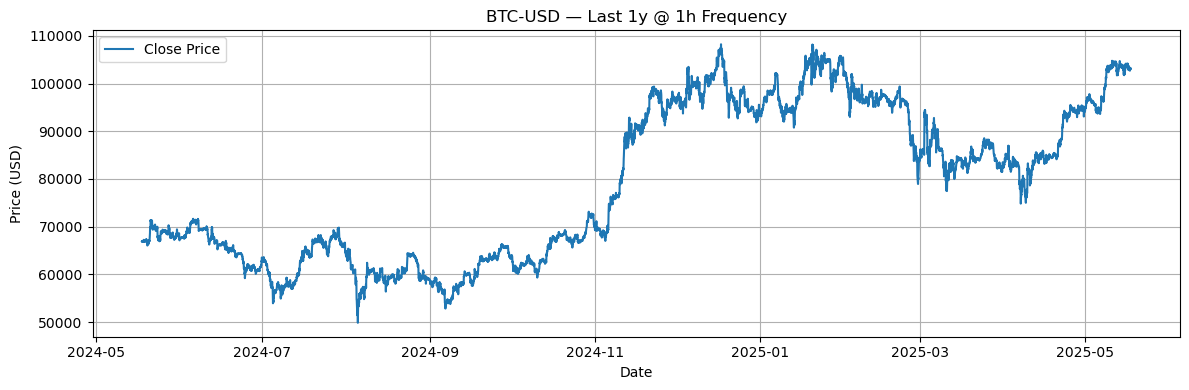

>>> Augmented Dickey–Fuller Test (H0: non-stationary)
ADF Statistic: -0.7089, p-value: 0.8444
  Critical Value (1%): -3.431
  Critical Value (5%): -2.862
  Critical Value (10%): -2.567

>>> KPSS Test (H0: stationary)
KPSS Statistic: 10.5824, p-value: 0.0100
  Critical Value (10%): 0.347
  Critical Value (5%): 0.463
  Critical Value (2.5%): 0.574
  Critical Value (1%): 0.739


In [38]:
# 1. Reload utils if needed
%load_ext autoreload
%autoreload 2

import Statsmodels_utils as smu

# 2. Fetch or load your 1-year hourly BTC series
btc_hourly = smu.fetch_and_plot_btc_hourly()

# 3. Run stationarity tests on the Close price
smu.test_stationarity(btc_hourly['Close'])


## Looking at the ADF and KPSS results:

- I see that the **ADF test** returns a p-value of 0.8444 (>> 0.05), so I **fail to reject** H₀ of a unit ro t—meaning the series appears non-stationary.  
- The **KPSS test** gives a p-value of 0.01 (< 0.05), so I **reject** H₀ of stationarty—also pointing to non-stationarity.  

Since both tests agree that the hourly Bitcoin series is non-stationary, I need to difference (i.e. detrend) the data before fitting any ARIMA or similar models that require a stationary input.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


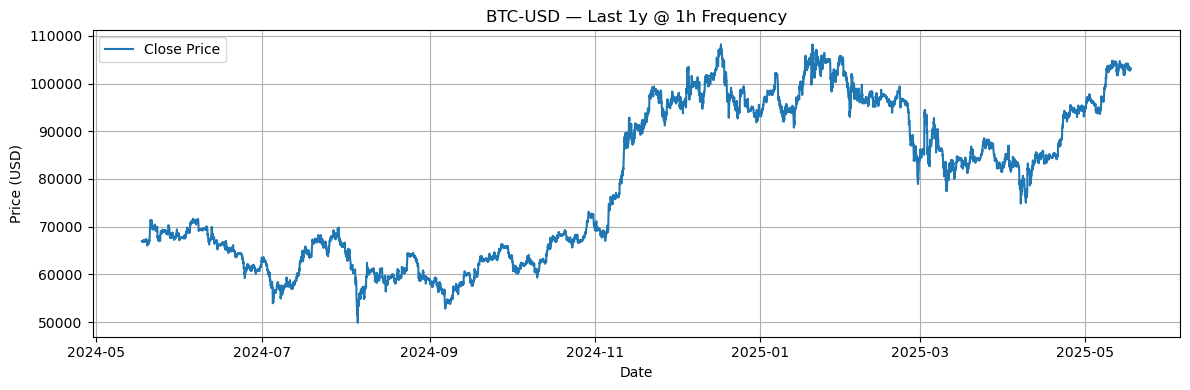

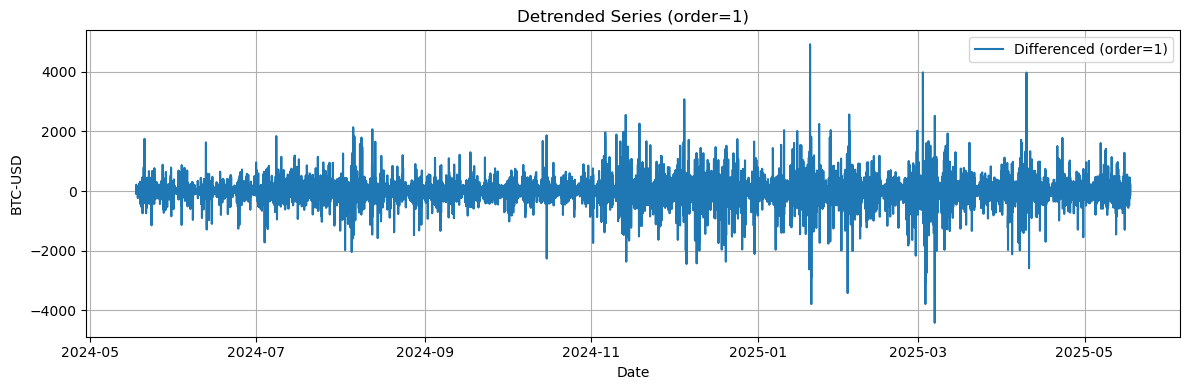

>>> Augmented Dickey–Fuller Test (H0: non-stationary)
ADF Statistic: -21.3410, p-value: 0.0000
  Critical Value (1%): -3.431
  Critical Value (5%): -2.862
  Critical Value (10%): -2.567

>>> KPSS Test (H0: stationary)
KPSS Statistic: 0.0907, p-value: 0.1000
  Critical Value (10%): 0.347
  Critical Value (5%): 0.463
  Critical Value (2.5%): 0.574
  Critical Value (1%): 0.739


In [48]:
%load_ext autoreload
%autoreload 2

import Statsmodels_utils as smu

# 1. Fetch your 1-year hourly BTC series
btc_hourly = smu.fetch_and_plot_btc_hourly()

# 2. Detrend and plot in one call
btc_diff = smu.detrend_series(btc_hourly['Close'], order=1, plot=True)

# 3. Re-run stationarity tests
smu.test_stationarity(btc_diff)


Now that I’ve differenced the series once, both tests agree in favor of stationarity:

- **ADF Test** (H₀: non-stationary)  
  - ADF Statistic = −21.3410, p-value = 0.0000 → p < 0.05, so I **reject** the null of a unit root.

- **KPSS Test** (H₀: stationary)  
  - KPSS Statistic = 0.0907, p-value = 0.1000 → p > 0.05, so I **fail to reject** the null of stationarity.

Because the differenced series now passes both the ADF and KPSS criteria, I can conclude it is **stationary** and safe to use for ARIMA or other models that assume stationarity.


In [78]:
# Convert your differenced Series to a DataFrame (if not already)
btc_diff_df = btc_diff.to_frame(name="Close_diff")

# Save to CSV with pandas
btc_diff_df.to_csv("btc_hourly_diff.csv", index=True)


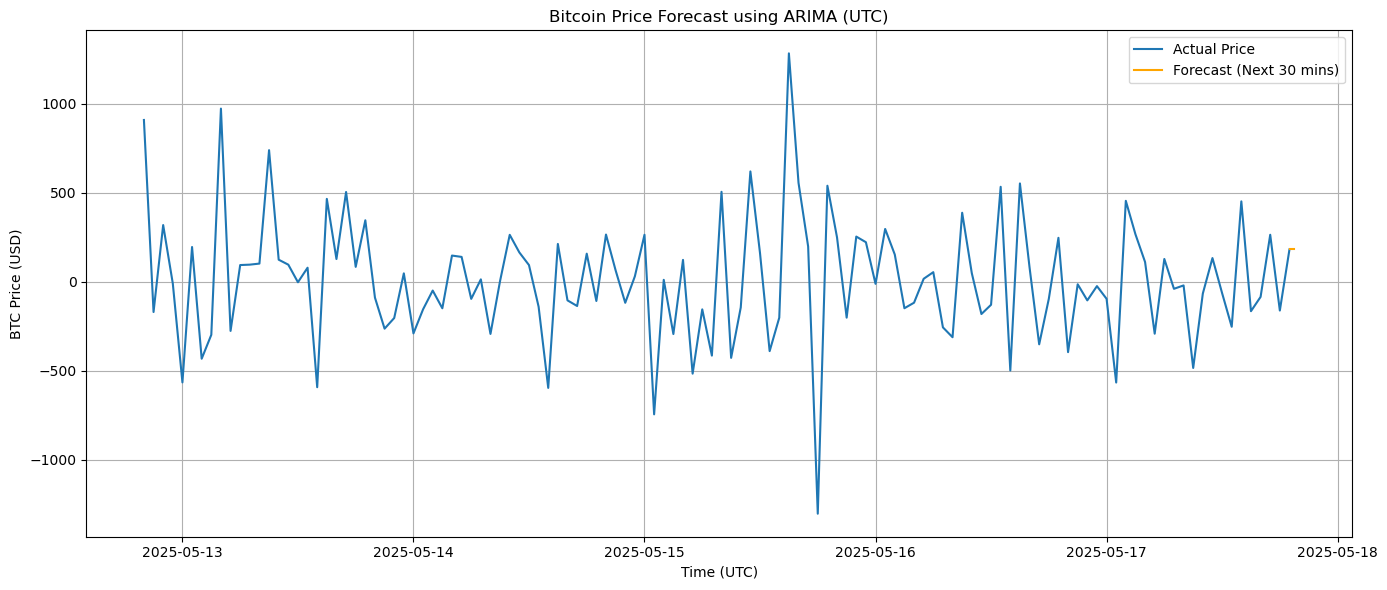

In [98]:
# 1) Convert the differenced series to a DataFrame named “price”
btc_diff_df = btc_diff.to_frame(name="price")

# 2) Fit ARIMA (order is inferred from your run_arima_analysis defaults)
model_res, forecast = smu.run_arima_analysis(btc_diff_df)

# 3) Plot the forecast
smu.plot_forecast(btc_diff_df, forecast)

- I first convert my stationary, differenced series (`btc_diff`) into a DataFrame called “price.” By passing this already‐detrended data to `run_arima_analysis`, I’m explicitly modeling the *changes* in Bitcoin’s price over time. The ARIMA forecast then predicts how much the price will move in the next 30 minutes, and `plot_forecast` visualizes those expected *increments* on top of the stationary differenced series.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


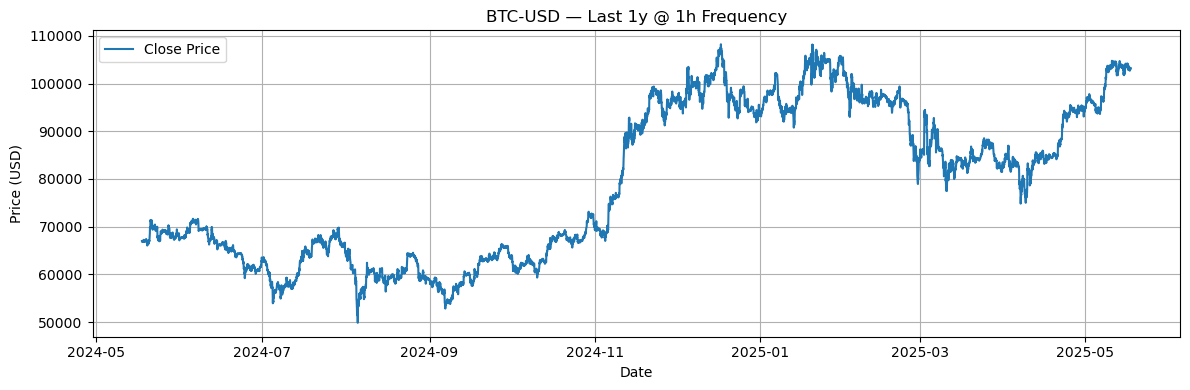

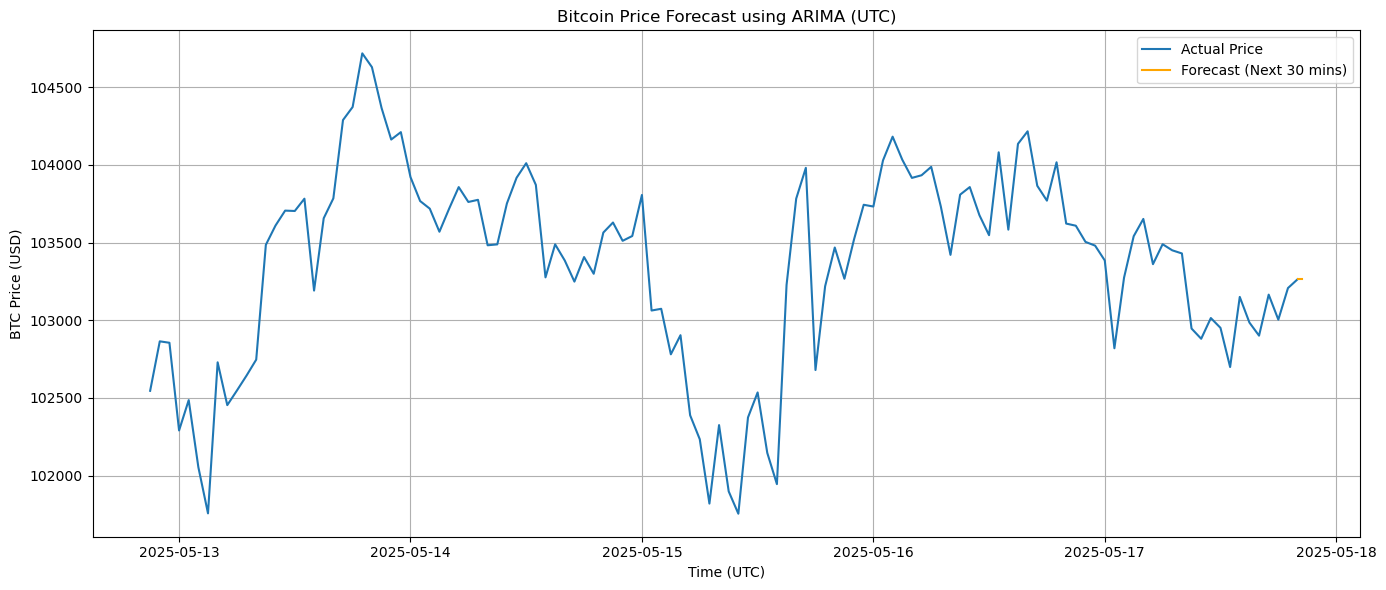

INFO:Statsmodels_utils:Data saved to 'btc_full_data.csv' and 'btc_price_forecast.csv'.


In [76]:
# 1) Reload utils so we pick up your existing functions
%load_ext autoreload
%autoreload 2

import Statsmodels_utils as smu

# 2) Fetch 1 year of hourly BTC data and rename Close to price
btc_hourly = smu.fetch_and_plot_btc_hourly()
df = btc_hourly[['Close']].rename(columns={'Close':'price'})

# 3) Fit ARIMA and get a 30-minute forecast
results, forecast = smu.run_arima_analysis(df)

# 4) Plot the last 120 minutes and the next 30-minute forecast
smu.plot_forecast(df, forecast)

# 5) Save the full history and forecast to CSV
smu.save_to_csv(df, forecast)


- **Running ARIMA Without Manual Detrending**  
Here I’m using the full 1-year hourly series (renamed to “price”) and feeding it directly into `run_arima_analysis`—no prior differencing step on my part. The function still resamples to 1-minute frequency and uses the ARIMA(2,1,2) model’s built-in differencing, but I’m not manually detrending first. By comparing these results and the resulting plots to those from the manually differenced series, you can clearly observe how explicit detrending affects forecast behavior and accuracy.
``


#  Autocorrelation and Partial Autocorrelation Functions

- **Autocorrelation** is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.


- **Partial Autocorrelation** also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

## Autocorrelation Analysis 

<Figure size 1000x400 with 0 Axes>

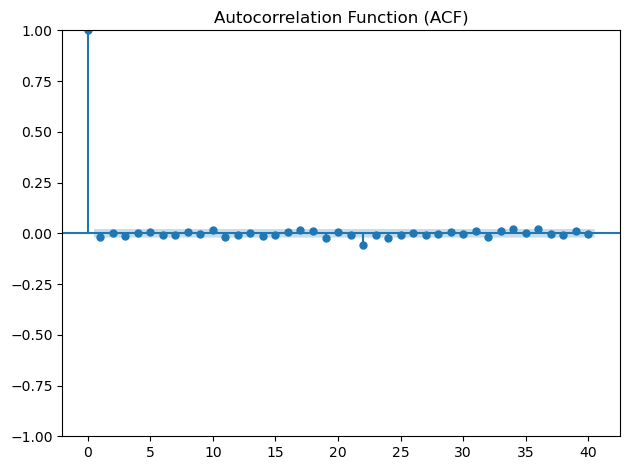

<Figure size 1000x400 with 0 Axes>

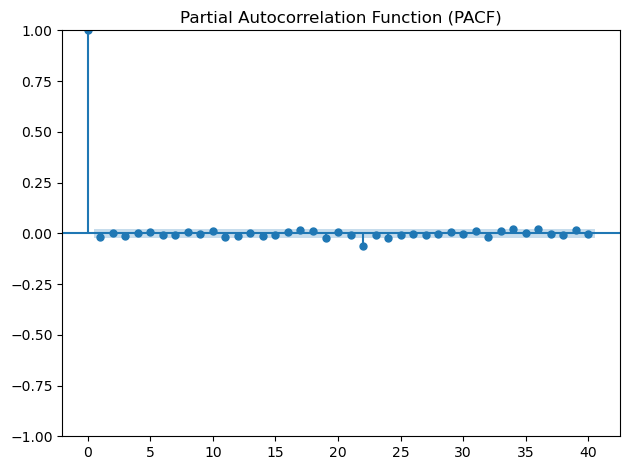

In [100]:
# In your notebook cell, after detrending:

# 1) Convert the differenced (detrended) series to a DataFrame named "price"
btc_diff_df = btc_diff.to_frame(name="price")

# 2) Plot ACF & PACF for the detrended series
smu.plot_acf_pacf(btc_diff_df, lags=40)


# Lag Plots 

- A **Lag plot** is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.


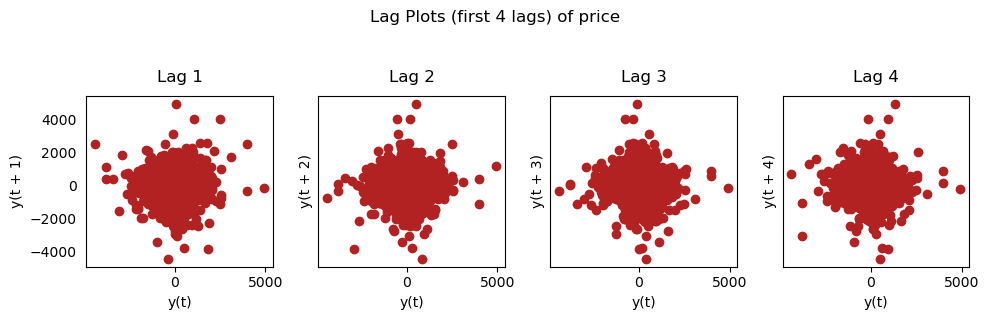

In [104]:
# In your notebook cell, after computing the differenced series:

# 1) Convert to DataFrame named "price"
btc_diff_df = btc_diff.to_frame(name="price")

# 2) Draw lag plots for lags 1 through 4
smu.plot_lag_series(btc_diff_df, column="price", lags=4, figsize=(10, 3), dpi=100, color="firebrick")


From these first four lag plots of the differenced Bitcoin series, I observe that:

- No clear linear pattern emerges in any of the scatterclouds—points are widely dispersed around the origin in all lags.  
- Clusters are roughly circular, not elongated along any diagonal, indicating very weak or zero correlation between \(y_t\) and \(y_{t+k}\) for \(k=1,2,3,4\).  
- This reinforces what the flat ACF/PACF told us: after differencing, the series behaves almost like white noise with no obvious autoregressive structure.

In practice, such lag‐plot behavior suggests that simple models (even ARIMA(0,1,0)) may suffice, since there’s little remaining serial dependence to capture. So now let’s fit that model:


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


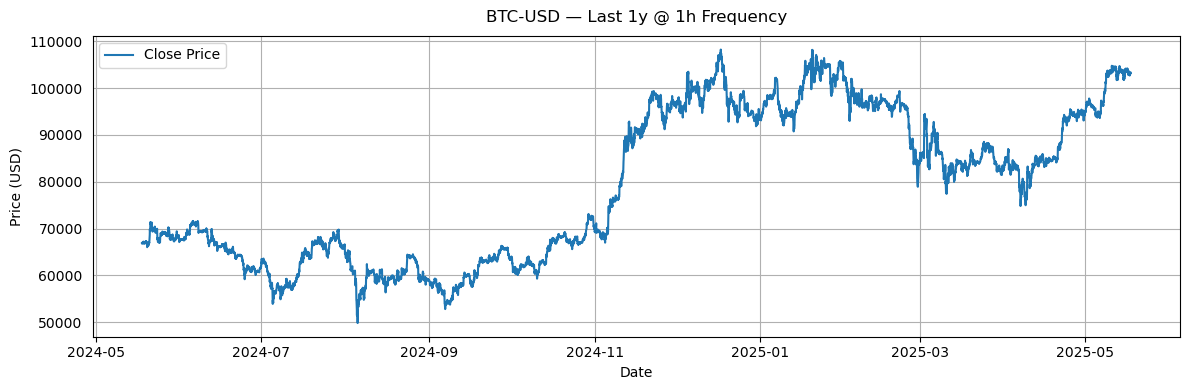

                               SARIMAX Results                                
Dep. Variable:                BTC-USD   No. Observations:                 8760
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -65744.945
Date:                Sat, 17 May 2025   AIC                         131491.889
Time:                        17:38:51   BIC                         131498.967
Sample:                             0   HQIC                        131494.301
                               - 8760                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.937e+05   1134.723    170.688      0.000    1.91e+05    1.96e+05
Ljung-Box (L1) (Q):                   2.52   Jarque-Bera (JB):             46702.51
Prob(Q):                              0.11   Pr

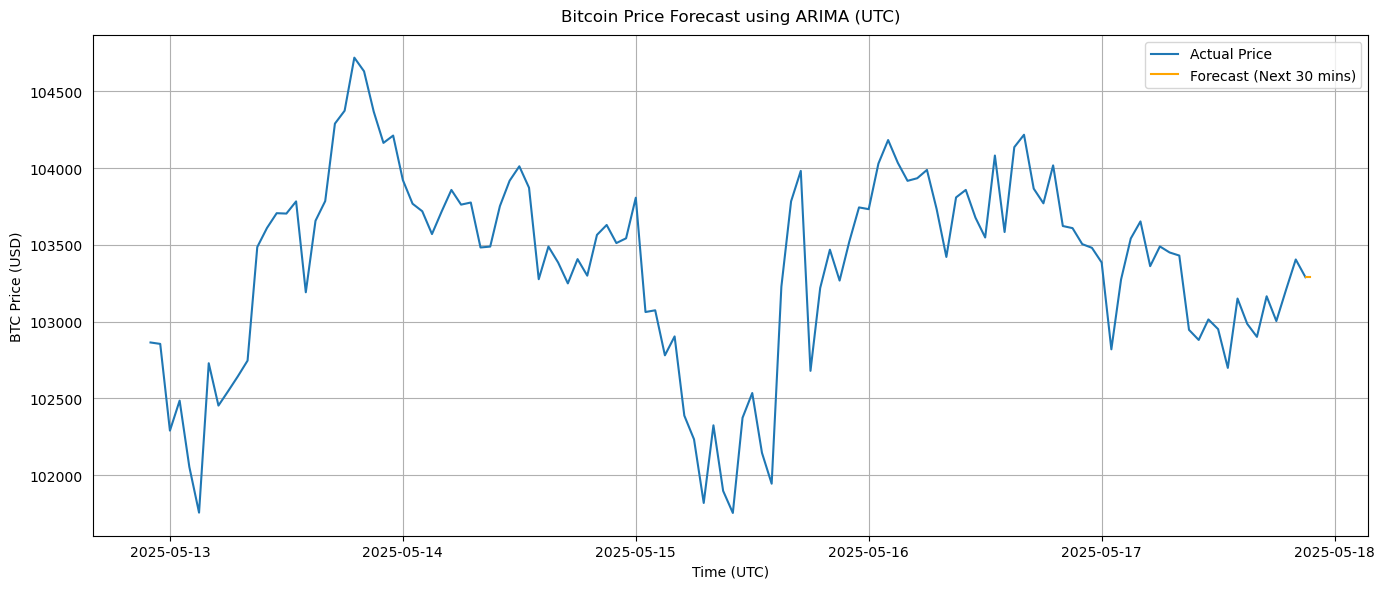

In [110]:
# 1) Reload utils
%load_ext autoreload
%autoreload 2

import Statsmodels_utils as smu
from statsmodels.tsa.arima.model import ARIMA

# 2) Prepare the price series
btc_hourly = smu.fetch_and_plot_btc_hourly()
df_price   = btc_hourly[['Close']].rename(columns={'Close':'price'})

# 3) ARIMA(0,1,0)
model_simple = ARIMA(df_price['price'], order=(0,1,0))
res_simple   = model_simple.fit()
print(res_simple.summary())

# 4) Forecast next 30 steps (minutes by default in your util) and plot
forecast_simple = res_simple.forecast(steps=30)
smu.plot_forecast(df_price, forecast_simple)


<Figure size 1000x400 with 0 Axes>

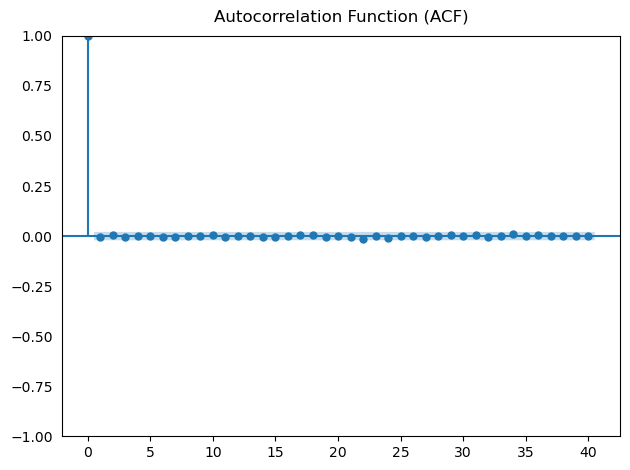

<Figure size 1000x400 with 0 Axes>

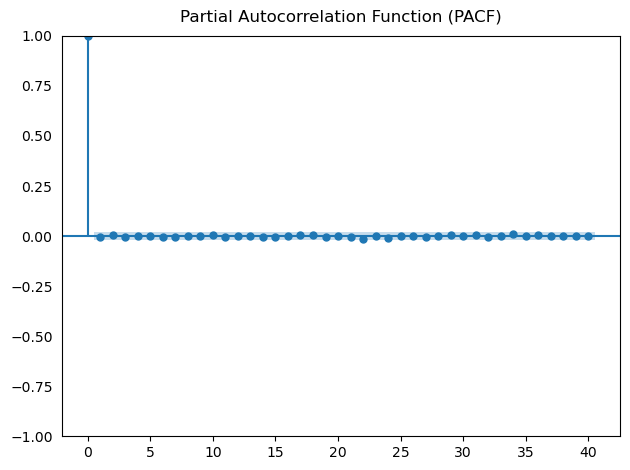

In [114]:
# 1) Extract residuals and rename to “price”
resid = res_simple.resid
resid_df = resid.to_frame(name="residual").rename(columns={'residual': 'price'})

# 2) Plot ACF & PACF of the residuals as if they were the “price” series
smu.plot_acf_pacf(resid_df, lags=40)


- Now that residual ACF and PACF show no significant lags, the next step is to formally test for white‐noise residuals  and, if they pass, you can have confidence that your ARIMA(0,1,0) model has captured all the serial dependence. Here’s how to proceed:

In [116]:
# 1) Perform the Ljung–Box test at several lags
from statsmodels.stats.diagnostic import acorr_ljungbox

# Use the residual series you already have
resid = res_simple.resid.dropna()

# Test at lags 10, 20, and 30
lb_results = acorr_ljungbox(resid, lags=[10,20,30], return_df=True)
print(lb_results)


     lb_stat  lb_pvalue
10  0.861322   0.999914
20  1.989386   1.000000
30  4.840293   1.000000


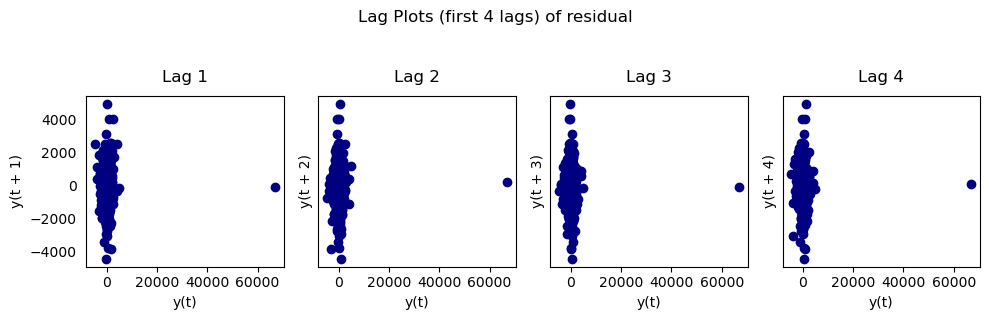

In [118]:
# 1) Extract and rename residuals for plotting
resid = res_simple.resid.dropna()
resid_df = resid.to_frame(name="residual")

# 2) Plot lag plots for the first 4 lags
smu.plot_lag_series(resid_df, column="residual", lags=4, figsize=(10,3), dpi=100, color="navy")


The residual lag‐plots reinforce the Ljung–Box findings:

* **Most points cluster tightly around the origin** with no obvious diagonal pattern, indicating little to no serial dependence in successive residuals.
* **A few extreme outliers** (points far off at high values) reflect rare large shocks, but they aren’t part of a systematic autocorrelation pattern.
* Overall, the cloud‐like scatter—with no elongated shape—confirms that the residuals behave like white noise.

Together with the Ljung–Box p-values, this gives us confidence that our simple ARIMA(0,1,0) model has captured all meaningful structure in the data and that the remaining residuals are essentially random.


# Time series analysis of Bitcoin using statsmodels on daily data


## Load and simulate 1-day + 3-minute real-time BTC data

In [151]:
btc_df = smu.fetch_historical_data()
btc_df = smu.simulate_realtime(btc_df, minutes=3)

INFO:Statsmodels_utils:Simulating 3 minutes of real-time price updates...
INFO:Statsmodels_utils:[2025-05-17 22:27:38.016939+00:00] Appended price: $103079
INFO:Statsmodels_utils:[2025-05-17 22:28:38.129397+00:00] Appended price: $103057
INFO:Statsmodels_utils:[2025-05-17 22:29:38.227887+00:00] Appended price: $103054


## Visualize the Time Series


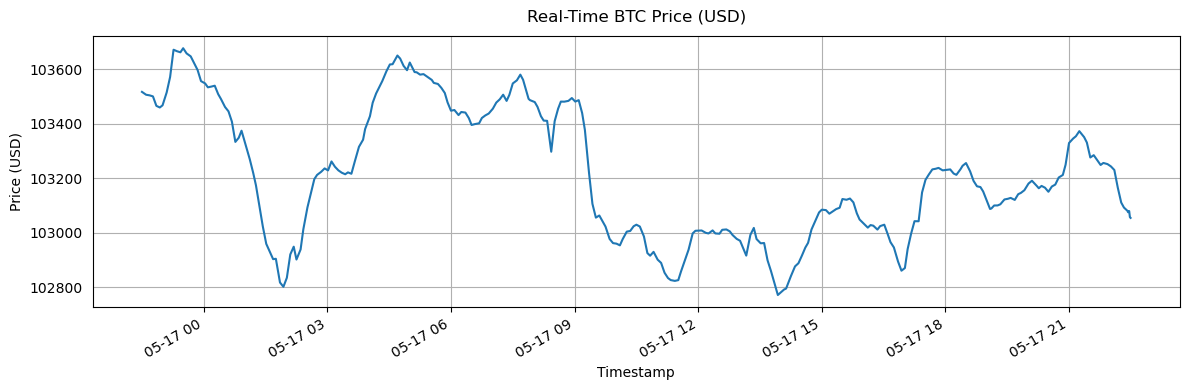

In [152]:
smu.plot_time_series(btc_df)

## Autocorrelation Analysis

<Figure size 1000x400 with 0 Axes>

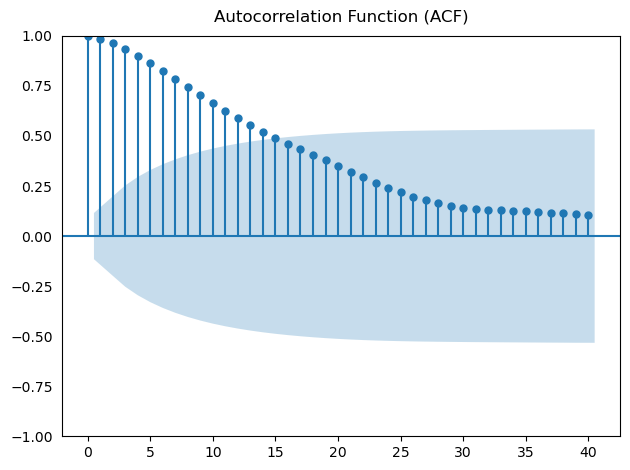

<Figure size 1000x400 with 0 Axes>

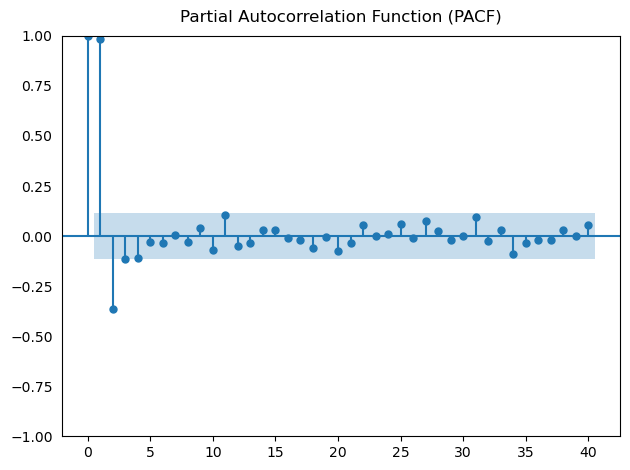

In [153]:
smu.plot_acf_pacf(btc_df)

## Fit ARIMA Model and Forecast 30 Minutes Ahead

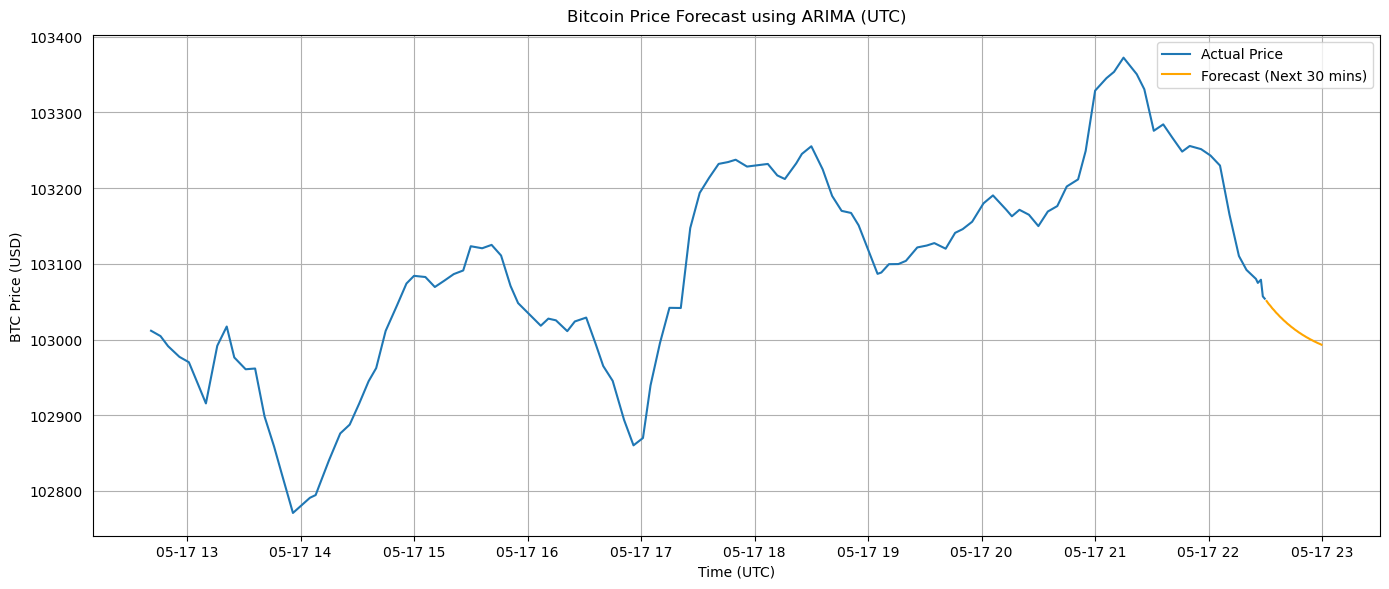

In [154]:
model_results, forecast = smu.run_arima_analysis(btc_df)
smu.plot_forecast(btc_df, forecast)

## Save Results to CSV

## Compare Historical BTC Prices at Different Time Scales

INFO:Statsmodels_utils:Saved data for Last 1 Day to btc_1day.csv


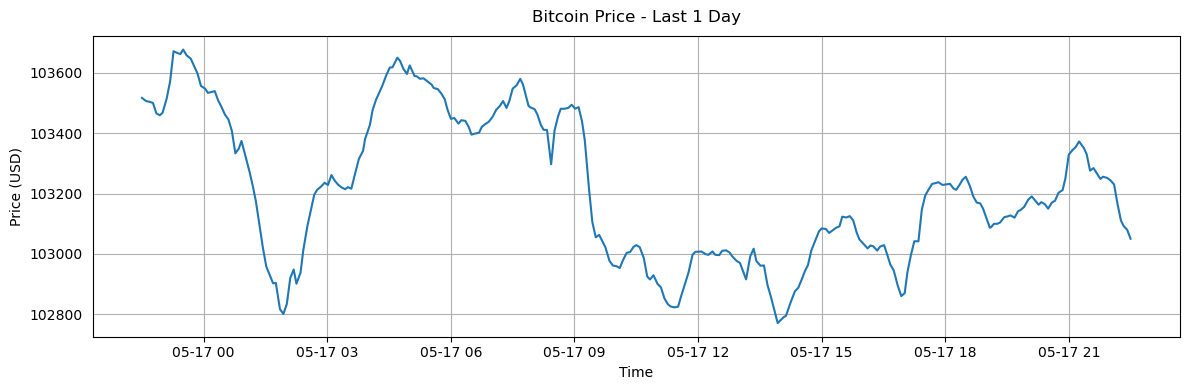

INFO:Statsmodels_utils:Saved data for Last 30 Days to btc_30days.csv


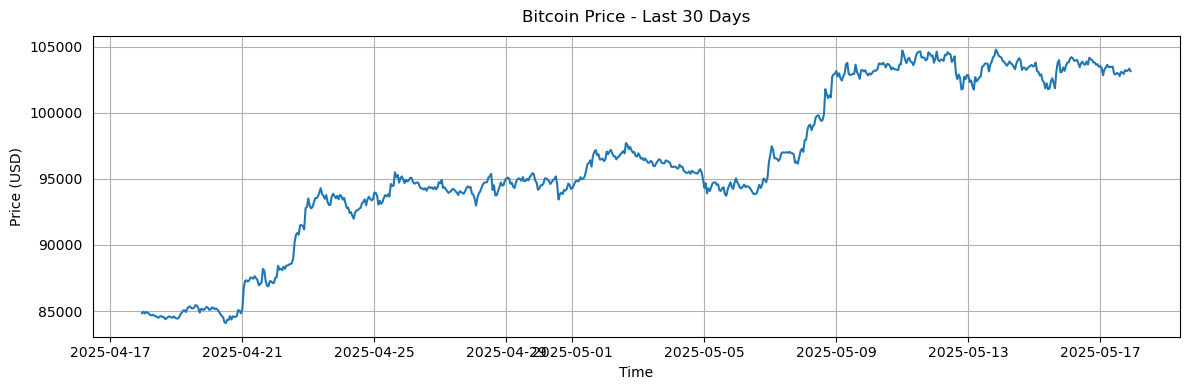

INFO:Statsmodels_utils:Saved data for Last 1 Year to btc_1year.csv


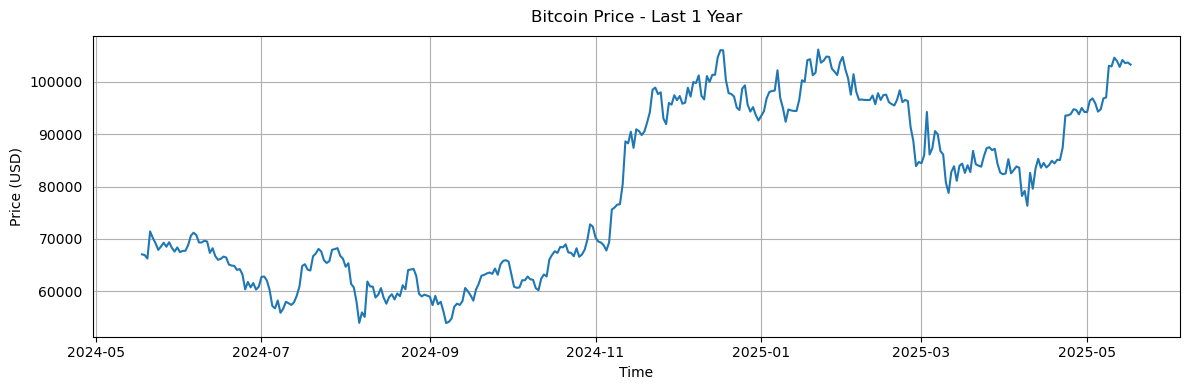

In [155]:
btc_1d = smu.fetch_and_process_data(1, "btc_1day.csv", "Last 1 Day")
btc_30d = smu.fetch_and_process_data(30, "btc_30days.csv", "Last 30 Days")
btc_1y = smu.fetch_and_process_data(365, "btc_1year.csv", "Last 1 Year")